**Test 2 | CSC 3303 | Sec: 1**

**Name: Hasan Tanveer Mahmood**


**Matric no: 1725413**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/content/drive/MyDrive/Test 2/survey data demographics.csv'
survey_demo = pd.read_csv(path)

In [3]:
survey_demo.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfie

In [4]:
survey_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Respondent      11398 non-null  int64  
 1   MainBranch      11398 non-null  object 
 2   Hobbyist        11398 non-null  object 
 3   OpenSourcer     11398 non-null  object 
 4   OpenSource      11317 non-null  object 
 5   Employment      11398 non-null  object 
 6   Country         11398 non-null  object 
 7   Student         11347 non-null  object 
 8   EdLevel         11286 non-null  object 
 9   UndergradMajor  10661 non-null  object 
 10  EduOther        11234 non-null  object 
 11  OrgSize         11302 non-null  object 
 12  DevType         11333 non-null  object 
 13  YearsCode       11389 non-null  object 
 14  Age1stCode      11385 non-null  object 
 15  YearsCodePro    11382 non-null  object 
 16  CareerSat       11398 non-null  object 
 17  JobSat          11397 non-null 

In [5]:
survey_demo.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 70, dtype: int64

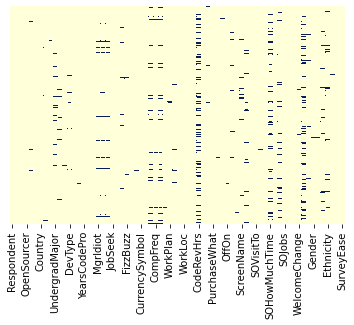

In [6]:
#Visualize the Null Values
sns.heatmap(survey_demo.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

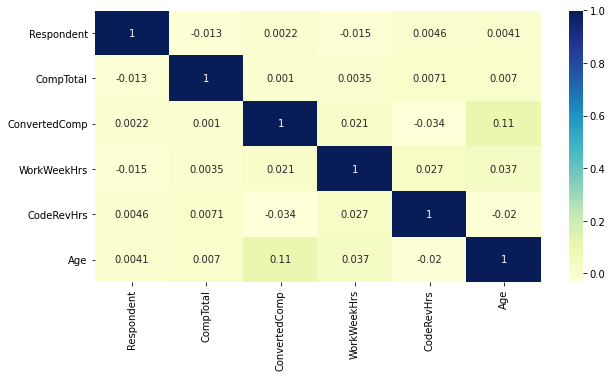

In [7]:
corr = survey_demo.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap="YlGnBu")

In [8]:
figure1 = px.scatter(survey_demo,title = 'Which country people have choosen their profession as Developer',x=None,y= 'Country',color = 'Country' )
figure1

In [9]:
#Here I have create a function to 
figure2 = go.Figure()


figure2.add_trace(go.Scatter(x=survey_demo.index, y=survey_demo['CareerSat'],line=dict(color='blue'),name='CareerSat'))


figure2.add_trace(go.Scatter(x=survey_demo.index, y=survey_demo['EdLevel'],line=dict(color='green'),name='Education Level'))


figure2.add_trace(go.Scatter(x=survey_demo.index, y=survey_demo['Country'],line=dict(color='red'),name='Country'))

figure2.update_layout( title='Country vs Education Level vs Career Satisfaction',
    hovermode="x",
    spikedistance=500, #This line is for showing the distance of spike
    xaxis=dict(
        linecolor="#FFFFFF",
        showspikes=True, # This line is for showing spike line for X-axis
        # Format spike
        spikethickness=3,
        spikedash="dot",
        spikecolor="#000000",
        spikemode="toaxis+across",
    )
)
figure2.show()

In [10]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
import findspark
findspark.init()
findspark.find()

'/content/spark-3.1.1-bin-hadoop3.2'

In [11]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import  udf
from pyspark.sql.types import StringType

from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc

from pyspark.sql.functions import asc

from pyspark.sql.functions import sum as Fsum
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
spark = SparkSession\
       .builder\
       .appName("Data Cleaning & Wragling")\
       .getOrCreate()

In [13]:
user_info = spark.read.csv(path, header =True)

In [14]:
user_info.take(1)


[Row(Respondent='4', MainBranch='I am a developer by profession', Hobbyist='No', OpenSourcer='Never', OpenSource='The quality of OSS and closed source software is about the same', Employment='Employed full-time', Country='United States', Student='No', EdLevel='Bachelor’s degree (BA, BS, B.Eng., etc.)', UndergradMajor='Computer science, computer engineering, or software engineering', EduOther='Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course', OrgSize='100 to 499 employees', DevType='Developer, full-stack', YearsCode='3', Age1stCode='16', YearsCodePro='Less than 1 year', CareerSat='Very satisfied', JobSat='Slightly satisfied', MgrIdiot='Very confident', MgrMoney='No', MgrWant='Not sure', JobSeek='I am not interested in new job opportunities', LastHireDate='Less than a year ago', LastInt='Write code by hand (e.g., on a whiteboar

In [15]:
user_info.printSchema()

root
 |-- Respondent: string (nullable = true)
 |-- MainBranch: string (nullable = true)
 |-- Hobbyist: string (nullable = true)
 |-- OpenSourcer: string (nullable = true)
 |-- OpenSource: string (nullable = true)
 |-- Employment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Student: string (nullable = true)
 |-- EdLevel: string (nullable = true)
 |-- UndergradMajor: string (nullable = true)
 |-- EduOther: string (nullable = true)
 |-- OrgSize: string (nullable = true)
 |-- DevType: string (nullable = true)
 |-- YearsCode: string (nullable = true)
 |-- Age1stCode: string (nullable = true)
 |-- YearsCodePro: string (nullable = true)
 |-- CareerSat: string (nullable = true)
 |-- JobSat: string (nullable = true)
 |-- MgrIdiot: string (nullable = true)
 |-- MgrMoney: string (nullable = true)
 |-- MgrWant: string (nullable = true)
 |-- JobSeek: string (nullable = true)
 |-- LastHireDate: string (nullable = true)
 |-- LastInt: string (nullable = true)
 |-- FizzBuzz: s

In [16]:
user_info.createOrReplaceTempView("Explore")

In [17]:
spark.sql('Select * from Explore limit 6').show()

+----------+--------------------+--------+--------------------+--------------------+------------------+--------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+----------+----------------+------------------+--------------------+------------------+--------+--------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+--------------------+---------+--------+-------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+----------+--------------------+-----+-----------+--------------------+----------+----------+--------------------+--------------------+--------------------+--------------------+-------------+---------+--------------------+--------------------+----------------

In [18]:
user_info.describe()

DataFrame[summary: string, Respondent: string, MainBranch: string, Hobbyist: string, OpenSourcer: string, OpenSource: string, Employment: string, Country: string, Student: string, EdLevel: string, UndergradMajor: string, EduOther: string, OrgSize: string, DevType: string, YearsCode: string, Age1stCode: string, YearsCodePro: string, CareerSat: string, JobSat: string, MgrIdiot: string, MgrMoney: string, MgrWant: string, JobSeek: string, LastHireDate: string, LastInt: string, FizzBuzz: string, JobFactors: string, ResumeUpdate: string, CurrencySymbol: string, CurrencyDesc: string, CompTotal: string, CompFreq: string, ConvertedComp: string, WorkWeekHrs: string, WorkPlan: string, WorkChallenge: string, WorkRemote: string, WorkLoc: string, ImpSyn: string, CodeRev: string, CodeRevHrs: string, UnitTests: string, PurchaseHow: string, PurchaseWhat: string, BetterLife: string, ITperson: string, OffOn: string, SocialMedia: string, Extraversion: string, ScreenName: string, SOVisit1st: string, SOVisi

In [19]:
user_info.show(n=6)

+----------+--------------------+--------+--------------------+--------------------+------------------+--------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+----------+----------------+------------------+--------------------+------------------+--------+--------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+--------------------+---------+--------+-------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+----------+--------------------+-----+-----------+--------------------+----------+----------+--------------------+--------------------+--------------------+--------------------+-------------+---------+--------------------+--------------------+----------------

In [20]:
user_info.take(4)

[Row(Respondent='4', MainBranch='I am a developer by profession', Hobbyist='No', OpenSourcer='Never', OpenSource='The quality of OSS and closed source software is about the same', Employment='Employed full-time', Country='United States', Student='No', EdLevel='Bachelor’s degree (BA, BS, B.Eng., etc.)', UndergradMajor='Computer science, computer engineering, or software engineering', EduOther='Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course', OrgSize='100 to 499 employees', DevType='Developer, full-stack', YearsCode='3', Age1stCode='16', YearsCodePro='Less than 1 year', CareerSat='Very satisfied', JobSat='Slightly satisfied', MgrIdiot='Very confident', MgrMoney='No', MgrWant='Not sure', JobSeek='I am not interested in new job opportunities', LastHireDate='Less than a year ago', LastInt='Write code by hand (e.g., on a whiteboar

In [21]:
user_info.describe().show()

+-------+------------------+--------------------+--------+--------------------+--------------------+------------------+-----------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+--------------+-----------------+--------+-----------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+----------+--------+-----+----------------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+------

In [22]:
user_info.describe("UndergradMajor").show()

+-------+--------------------+
|summary|      UndergradMajor|
+-------+--------------------+
|  count|               10661|
|   mean|                null|
| stddev|                null|
|    min|A business discip...|
|    max|Web development o...|
+-------+--------------------+



In [23]:
user_info.describe("Country").show()

+-------+-----------+
|summary|    Country|
+-------+-----------+
|  count|      11398|
|   mean|       null|
| stddev|       null|
|    min|Afghanistan|
|    max|   Zimbabwe|
+-------+-----------+



In [24]:
user_info.count()

11398

In [25]:
#Drop duplicates Contry
user_info.select("Country").dropDuplicates().sort("country").show()

+--------------------+
|             Country|
+--------------------+
|         Afghanistan|
|             Albania|
|             Algeria|
|           Argentina|
|             Armenia|
|           Australia|
|             Austria|
|          Azerbaijan|
|             Bahrain|
|          Bangladesh|
|             Belarus|
|             Belgium|
|             Bolivia|
|Bosnia and Herzeg...|
|              Brazil|
|   Brunei Darussalam|
|            Bulgaria|
|             Burundi|
|            Cambodia|
|            Cameroon|
+--------------------+
only showing top 20 rows



In [26]:
user_info.select(["MainBranch","Respondent","JobSat"]).where(user_info.CareerSat=="Very satisfied").show()

+--------------------+----------+--------------------+
|          MainBranch|Respondent|              JobSat|
+--------------------+----------+--------------------+
|I am a developer ...|         4|  Slightly satisfied|
|I am a developer ...|        13|      Very satisfied|
|I am a developer ...|        16|  Slightly satisfied|
|I am not primaril...|        20|Slightly dissatis...|
|I am a developer ...|        24|      Very satisfied|
|I am a developer ...|        25|      Very satisfied|
|I am a developer ...|        26|      Very satisfied|
|I am a developer ...|        29|  Slightly satisfied|
|I am a developer ...|        39|      Very satisfied|
|I am a developer ...|        49|      Very satisfied|
|I am a developer ...|        54|  Slightly satisfied|
|I am not primaril...|        57|      Very satisfied|
|I am a developer ...|        61|      Very satisfied|
|I am a developer ...|        62|Slightly dissatis...|
|I am not primaril...|        67|      Very satisfied|
|I am a de

In [27]:
user_info.select(["MainBranch","Respondent","JobSat"]).where(user_info.CareerSat=="Very satisfied").count()

4777

In [28]:
survey_demo.groupby('Country')

In [29]:
survey_demo.groupby('Country') ['Age','Gender'].head()

,Age,Gender
0,22.0,Man
1,23.0,Man
2,28.0,Man
3,26.0,Man
4,29.0,Man
...,...,...
11043,21.0,Man
11126,24.0,Man
11195,28.0,Man
11240,25.0,Man


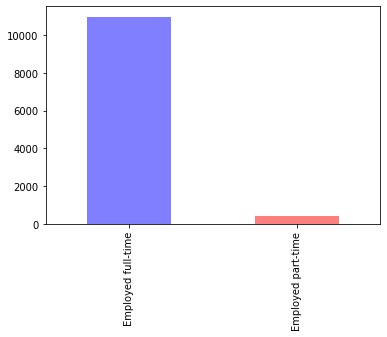

In [30]:
#Barplot of job status
alpha_color = 0.5
survey_demo['Employment'].value_counts().plot(kind='bar',color=['b','r'],alpha=alpha_color)

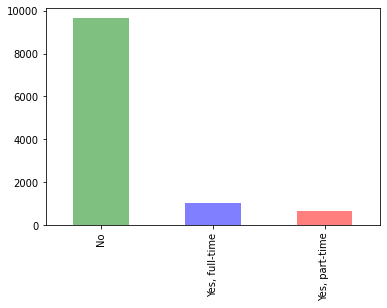

In [31]:
#Barplot of job taking
alpha_color = 0.5
survey_demo['Student'].value_counts().plot(kind='bar',color=['g','b','r'],alpha=alpha_color)

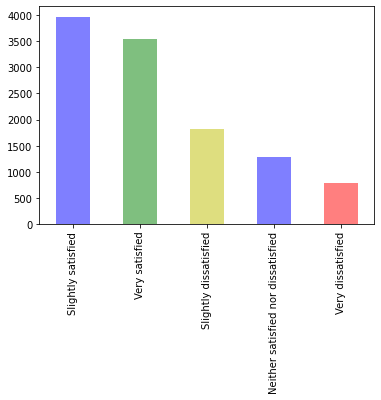

In [32]:
#Barplot of satisfaction level
alpha_color = 0.5
survey_demo['JobSat'].value_counts().plot(kind='bar',color=['b','g','y','b','r'],alpha=alpha_color)

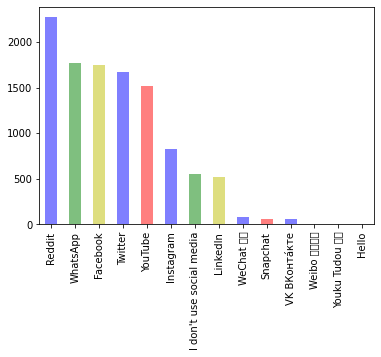

In [33]:
#Barplot of which soicial media infuenced most for being developer 
alpha_color = 0.5
survey_demo['SocialMedia'].value_counts().plot(kind='bar',color=['b','g','y','b','r'],alpha=alpha_color)

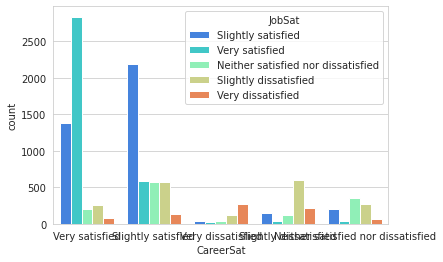

In [34]:
#Job Staisfaction
sns.set_style('whitegrid')
sns.countplot(x='CareerSat',hue='JobSat',data=survey_demo,palette='rainbow')

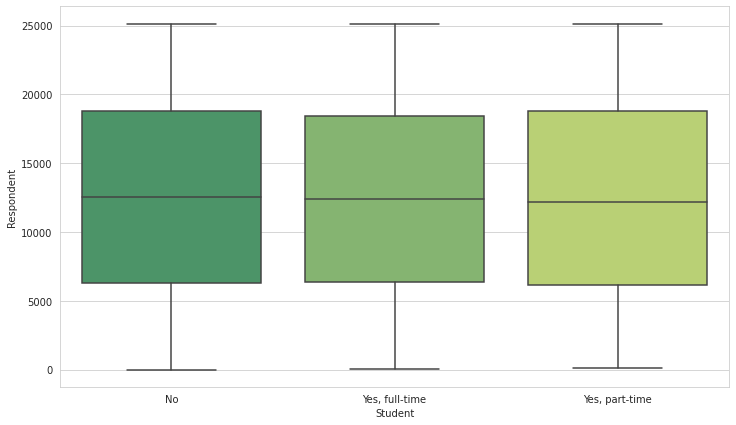

In [35]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Student',y='Respondent',data=survey_demo,palette='summer')

**Dataset 2**

In [36]:
path = '/content/drive/MyDrive/Test 2/survey data technologies normalised.csv'
survey_tech = pd.read_csv(path)

In [37]:
survey_tech.head()

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim,NaN,NaN,NaN,NaN
3,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN
4,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code,NaN,NaN,NaN,NaN


In [38]:
survey_tech.describe()

,Respondent,OpSys,Containers,BlockchainOrg,BlockchainIs
count,74589.000000,0.0,0.0,0.0,0.0
mean,12435.258228,NaN,NaN,NaN,NaN
std,7239.729251,NaN,NaN,NaN,NaN
min,4.000000,NaN,NaN,NaN,NaN
25%,6196.000000,NaN,NaN,NaN,NaN
50%,12422.000000,NaN,NaN,NaN,NaN
75%,18756.000000,NaN,NaN,NaN,NaN
max,25142.000000,NaN,NaN,NaN,NaN


In [39]:
survey_tech.isnull().sum()

Respondent                    1
LanguageWorkedWith        14798
LanguageDesireNextYear    18826
DatabaseWorkedWith        43215
DatabaseDesireNextYear    45015
PlatformWorkedWith        35382
PlatformDesireNextYear    30276
WebFrameWorkedWith        49787
WebFrameDesireNextYear    50023
DevEnviron                41284
OpSys                     74590
Containers                74590
BlockchainOrg             74590
BlockchainIs              74590
dtype: int64

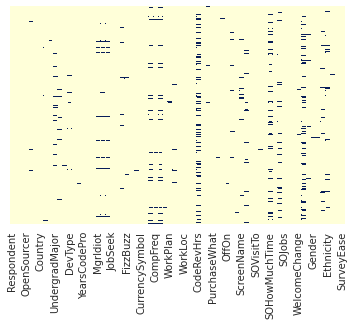

In [40]:
#Visualize the Null Values
sns.heatmap(survey_demo.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')


In [41]:
# fill the missing values for cateorical terms - mode
survey_tech['LanguageWorkedWith'] = survey_tech["LanguageWorkedWith"].fillna(survey_tech['LanguageWorkedWith'].mode()[0])
survey_tech['LanguageDesireNextYear'] = survey_tech["LanguageDesireNextYear"].fillna(survey_tech['LanguageDesireNextYear'].mode()[0])
survey_tech['DatabaseDesireNextYear'] = survey_tech["DatabaseDesireNextYear"].fillna(survey_tech['DatabaseDesireNextYear'].mode()[0])
survey_tech['PlatformWorkedWith'] = survey_tech["PlatformWorkedWith"].fillna(survey_tech['PlatformWorkedWith'].mode()[0])
survey_tech['WebFrameWorkedWith'] = survey_tech["WebFrameWorkedWith"].fillna(survey_tech['WebFrameWorkedWith'].mode()[0])
survey_tech['PlatformDesireNextYear'] = survey_tech["PlatformDesireNextYear"].fillna(survey_tech['PlatformDesireNextYear'].mode()[0])
survey_tech['WebFrameDesireNextYear'] = survey_tech["WebFrameDesireNextYear"].fillna(survey_tech['WebFrameDesireNextYear'].mode()[0])
survey_tech['DevEnviron'] = survey_tech["DevEnviron"].fillna(survey_tech['DevEnviron'].mode()[0])


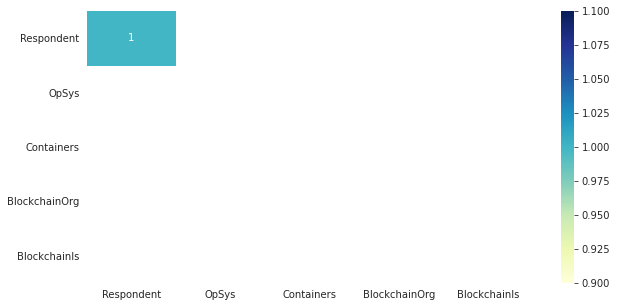

In [42]:
corr = survey_tech.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap="YlGnBu")

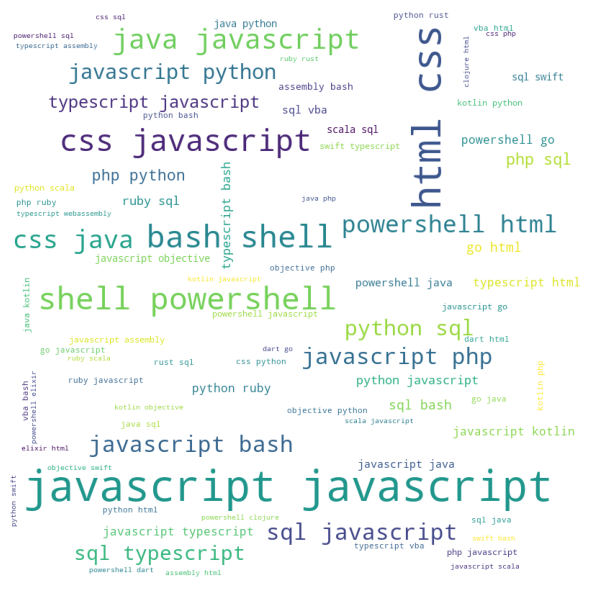

In [43]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in survey_tech.LanguageWorkedWith:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()